In [1]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
%load_ext autoreload
%autoreload 2

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [2]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

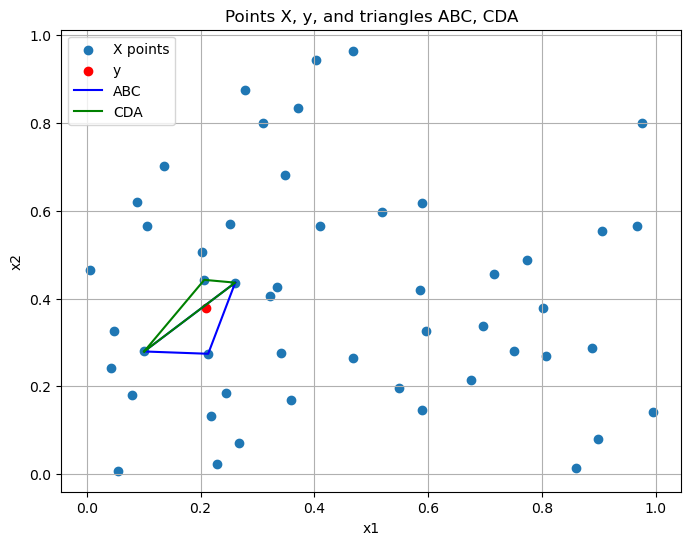

A = [0.26071605 0.43635845]
B = [0.21315735 0.274245  ]
C = [0.10056103 0.27951775]
D = [0.20634391 0.44272557]


In [3]:
from exam_2024_PetraNoah2 import InterpolationSolver

# Generate random points in the unit square
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Solve for barycentric coordinates and determine triangle
solver.solve_question1()

#Plot the points and triangles
plt.figure(figsize=(8, 6))
plt.scatter(solver.X[:, 0], solver.X[:, 1], label='X points')
plt.scatter(solver.y[0], solver.y[1], color='red', label='y')

# Plot triangles ABC and CDA
if solver.A is not None and solver.B is not None and solver.C is not None:
    plt.plot([solver.A[0], solver.B[0], solver.C[0], solver.A[0]], [solver.A[1], solver.B[1], solver.C[1], solver.A[1]], 'b-', label='ABC')
    if solver.D is not None:
        plt.plot([solver.C[0], solver.D[0], solver.A[0], solver.C[0]], [solver.C[1], solver.D[1], solver.A[1], solver.C[1]], 'g-', label='CDA')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points X, y, and triangles ABC, CDA')
plt.legend()
plt.grid(True)
plt.show()

print(f"A = {solver.A}")
print(f"B = {solver.B}")
print(f"C = {solver.C}")
print(f"D = {solver.D}")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [4]:
from exam_2024_PetraNoah2 import InterpolationSolver
import numpy as np

# Generate random points in the unit square
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Compute barycentric coordinates and determine the triangle
solver.solve_question2()

# Print barycentric coordinates and triangle location
print(f"Barycentric coordinates for y: ABC {solver.r_ABC}, CDA {solver.r_CDA}")
print(f"Point y is located inside triangle {solver.triangle_name}.")
interpolated_value = solver.interpolate_value()
print(f"The interpolated value of f(y) at y = {solver.y} is: {interpolated_value}")

Barycentric coordinates for y: ABC (0.6286263152916166, 0.06910145494351515, 0.3022722297648682), CDA (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Point y is located inside triangle ABC.
The interpolated value of f(y) at y = [0.20901926 0.37774759] is: 0.08405201731052576


In [5]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [6]:
from exam_2024_PetraNoah2 import InterpolationSolver
import numpy as np

# Generate random points in the unit square
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Solve Question 3: Compute the approximation of f(y) and compare with the true value
solver.solve_question3()

Interpolated value using triangle ABC: 0.08405201731052576
True value of f(y): 0.0789565216259594
Absolute error: 0.005095495684566367


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [7]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

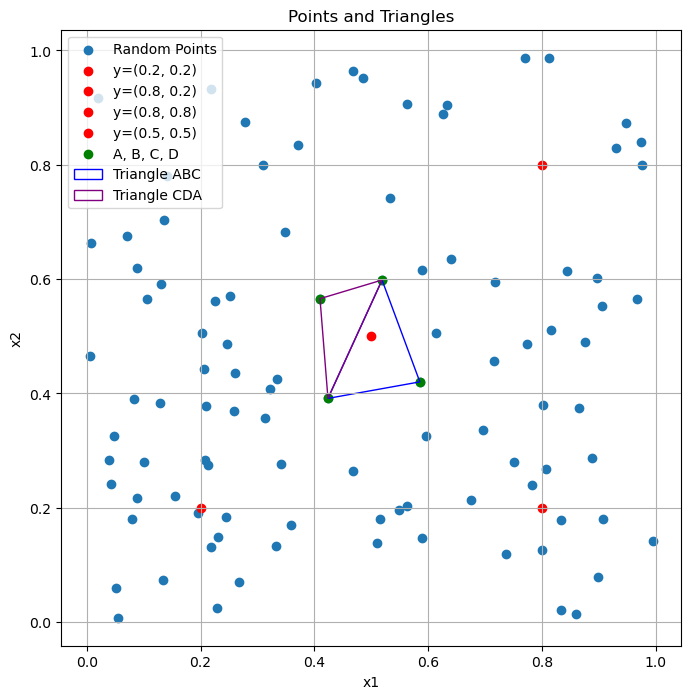

Point y: (0.2, 0.2)
Approximated value of f(y): 0.04010805749040401
True value of f(y): 0.04000000000000001
---
Point y: (0.8, 0.2)
Approximated value of f(y): 0.16113809082073205
True value of f(y): 0.16000000000000003
---
Point y: (0.8, 0.8)
Approximated value of f(y): 0.6453145986852267
True value of f(y): 0.6400000000000001
---
Point y: (0.5, 0.5)
Approximated value of f(y): 0.252396401412959
True value of f(y): 0.25
---


In [8]:
from exam_2024_PetraNoah2 import InterpolationSolver

# Create an instance of InterpolationSolver
solver = InterpolationSolver(None, None)

# Solve Question 4
solver.question4()

As we see from the plot, the point (0.5, 0.5) is inside the triangle ABC.
The rest are outside both triangles. 